In [ ]:
import numpy as np
from numpy.linalg import svd, matrix_rank
import pandas as pd
import matplotlib.pyplot as plt
from IPython import get_ipython
from util import (
    svdcomp,
    nextplot,
    plot_matrix,
    plot_xy,
    plot_cov,
    match_categories,
)  # see util.py
from sklearn.cluster import KMeans

# setup plotting 
from IPython import get_ipython
import psutil
inTerminal = not "IPKernelApp" in get_ipython().config
inJupyterNb = any(filter(lambda x: x.endswith("jupyter-notebook"), psutil.Process().parent().cmdline()))
get_ipython().run_line_magic("matplotlib", "" if inTerminal else "notebook" if inJupyterNb else "widget")

# 1 Intuition on SVD

In [3]:
M1 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ]
)

M2 = np.array(
    [
        [0, 0, 0, 0, 0],
        [0, 2, 1, 2, 0],
        [0, 2, 1, 2, 0],
        [0, 2, 1, 2, 0],
        [0, 0, 0, 0, 0],
    ]
)

M3 = np.array([[0, 0, 0, 0], 
               [0, 1, 1, 1], 
               [0, 1, 1, 1], 
               [0, 1, 1, 1], 
               [0, 1, 1, 1]])

M4 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
    ]
)

M5 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1],
        [0, 0, 1, 1, 1],
    ]
)

M6 = np.array(
    [
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
    ]
)

## 1a

In [4]:
# YOUR PART
# In the Report

## 1b

In [5]:
# YOUR PART
np.linalg.svd(M1)
np.linalg.svd(M2)
np.linalg.svd(M3)
np.linalg.svd(M4)
np.linalg.svd(M5)
np.linalg.svd(M6)

(array([[-4.61939766e-01, -1.91341716e-01,  8.36419811e-01,
          2.24503673e-01,  0.00000000e+00],
        [-4.61939766e-01, -1.91341716e-01, -4.90470696e-01,
          7.13749603e-01,  4.80660718e-17],
        [-3.82683432e-01,  9.23879533e-01,  2.22044605e-16,
         -5.55111512e-17, -1.39805270e-17],
        [-4.61939766e-01, -1.91341716e-01, -1.72974557e-01,
         -4.69126638e-01, -7.07106781e-01],
        [-4.61939766e-01, -1.91341716e-01, -1.72974557e-01,
         -4.69126638e-01,  7.07106781e-01]]),
 array([4.82842712e+00, 8.28427125e-01, 2.43075238e-16, 2.99007148e-18,
        2.13821177e-50]),
 array([[-4.61939766e-01, -4.61939766e-01, -3.82683432e-01,
         -4.61939766e-01, -4.61939766e-01],
        [ 1.91341716e-01,  1.91341716e-01, -9.23879533e-01,
          1.91341716e-01,  1.91341716e-01],
        [ 8.64514113e-01, -3.36387070e-01,  1.11022302e-16,
         -2.64063522e-01, -2.64063522e-01],
        [ 5.11404717e-02,  7.98024899e-01, -8.32667268e-17,
        

## 1c

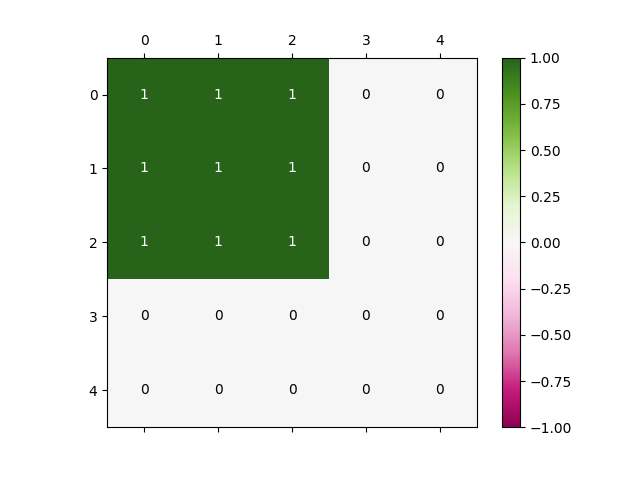

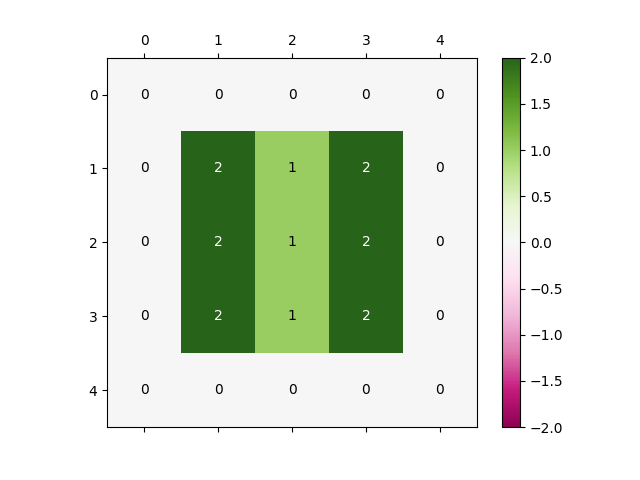

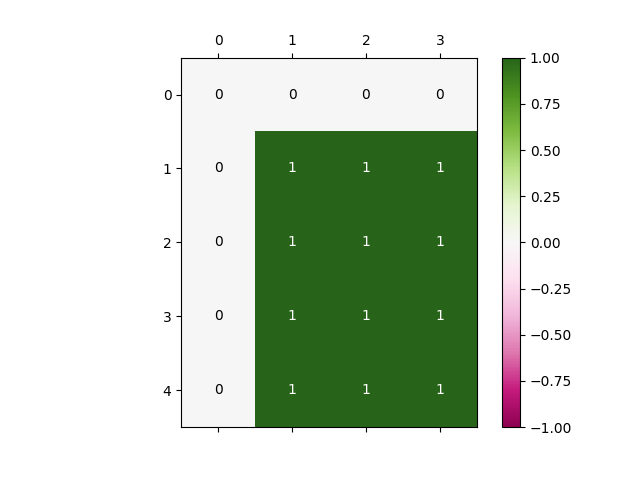

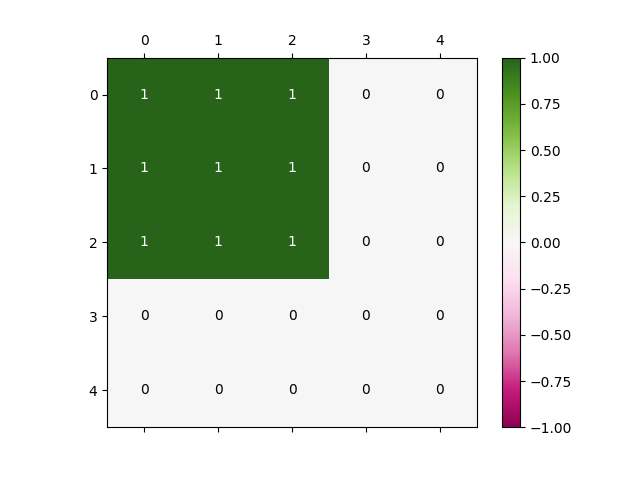

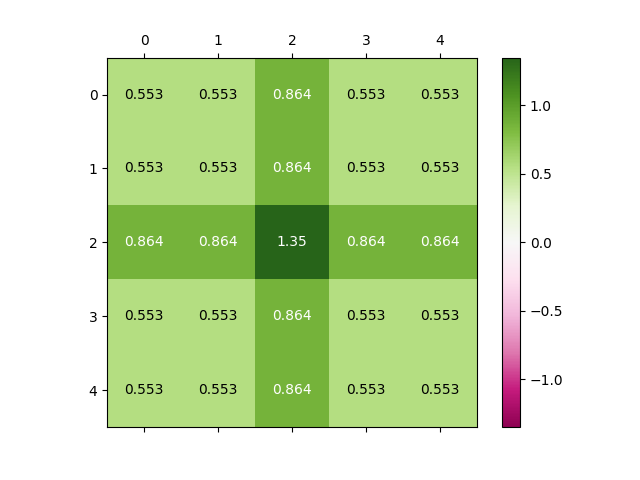

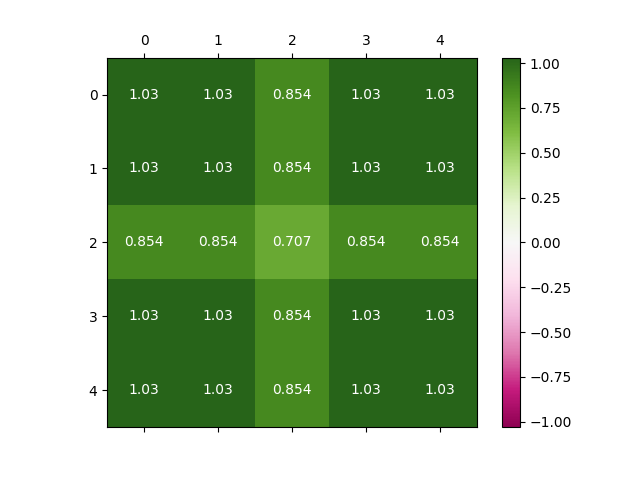

In [6]:
# You can use the functions svdcomp and plot_matrix from util.py
# YOUR PART
x1 = svdcomp(M1, range(1))
x2 = svdcomp(M2, range(1))
x3 = svdcomp(M3, range(1))
x4 = svdcomp(M4, range(1))
x5 = svdcomp(M5, range(1))
x6 = svdcomp(M6, range(1))

plot_matrix(x1)
plot_matrix(x2)
plot_matrix(x3)
plot_matrix(x4)
plot_matrix(x5)
plot_matrix(x6)

## 1d

In [13]:
# Another method to compute the rank is matrix_rank.
# YOUR PART
U, s, Vt = np.linalg.svd(M6)
S = np.diag(s)
s
#np.linalg.matrix_rank(M6)


array([4.82842712e+00, 8.28427125e-01, 2.43075238e-16, 2.99007148e-18,
       2.13821177e-50])

# 2 The SVD on Weather Data

In [14]:
# Load the data
climate = pd.read_csv("data/worldclim.csv")
coord = pd.read_csv("data/worldclim_coordinates.csv")
lon = coord["lon"]
lat = coord["lat"]

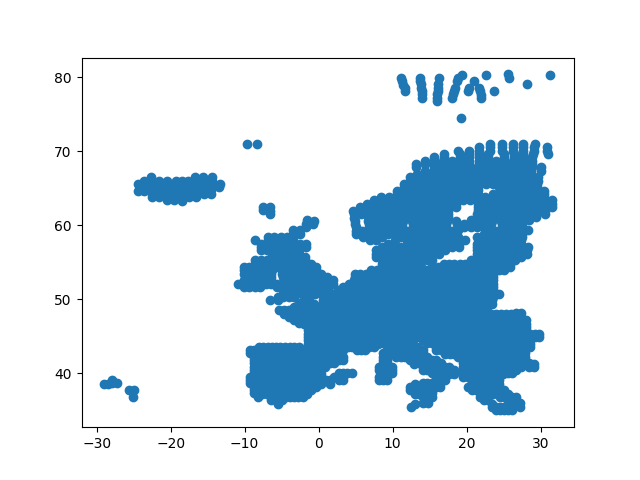

In [15]:
# Plot the coordinates
plot_xy(lon, lat)

## 2a

In [33]:
# YOUR PART
# # Normalize the data to z-scores. Store the result in X.
X = (climate-np.mean(climate))/np.std(climate)

/var/folders/j5/tqm3_jyd1mz9mmb920s62hlm0000gn/T/ipykernel_47487/2722728386.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X.hist(ax=plt.gca())


array([[<AxesSubplot: title={'center': 'min1'}>,
        <AxesSubplot: title={'center': 'min2'}>,
        <AxesSubplot: title={'center': 'min3'}>,
        <AxesSubplot: title={'center': 'min4'}>,
        <AxesSubplot: title={'center': 'min5'}>,
        <AxesSubplot: title={'center': 'min6'}>,
        <AxesSubplot: title={'center': 'min7'}>],
       [<AxesSubplot: title={'center': 'min8'}>,
        <AxesSubplot: title={'center': 'min9'}>,
        <AxesSubplot: title={'center': 'min10'}>,
        <AxesSubplot: title={'center': 'min11'}>,
        <AxesSubplot: title={'center': 'min12'}>,
        <AxesSubplot: title={'center': 'max1'}>,
        <AxesSubplot: title={'center': 'max2'}>],
       [<AxesSubplot: title={'center': 'max3'}>,
        <AxesSubplot: title={'center': 'max4'}>,
        <AxesSubplot: title={'center': 'max5'}>,
        <AxesSubplot: title={'center': 'max6'}>,
        <AxesSubplot: title={'center': 'max7'}>,
        <AxesSubplot: title={'center': 'max8'}>,
        <AxesSu

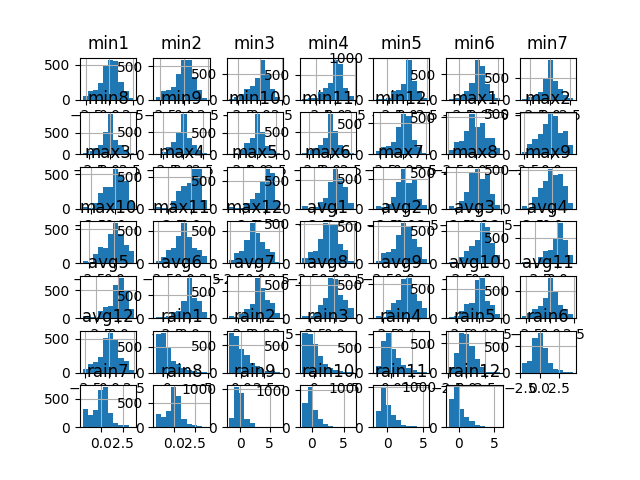

In [34]:
# Plot histograms of attributes
nextplot()
X.hist(ax=plt.gca())

## 2b

In [35]:
# Compute the SVD of the normalized climate data and store it in variables U,s,Vt. What
# is the rank of the data?
# YOUR PART
U, s, Vt = np.linalg.svd(X)
S = np.diag(s)
np.linalg.matrix_rank(X)

48

## 2c

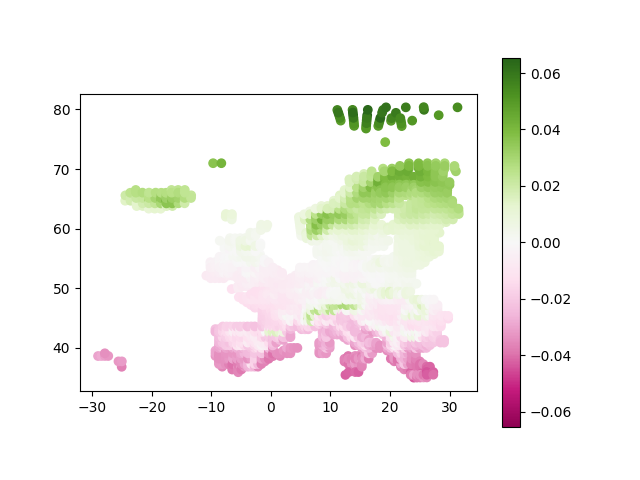

In [36]:
# Here is an example plot.
U, s, Vt = np.linalg.svd(X)
plot_xy(lon, lat, U[:, 0])

In [ ]:
# For interpretation, it may also help to look at the other component matrices and
# perhaps use other plot functions (e.g., plot_matrix).
# YOUR PART

## 2d

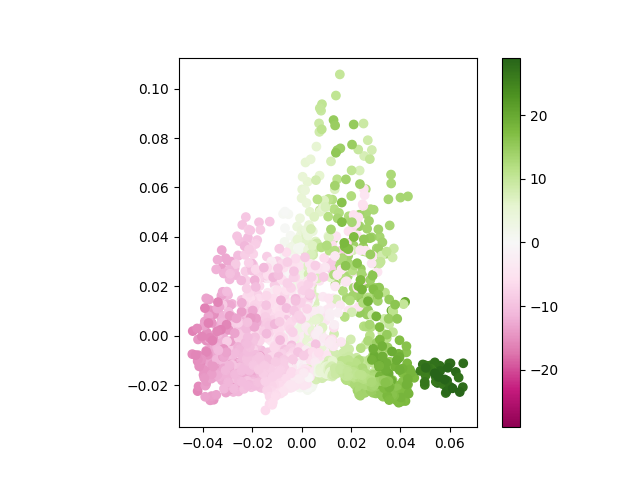

In [53]:
# Here is an example.
plot_xy(U[:, 0], U[:, 1], lat - np.mean(lat))

## 2e

In [37]:
# 2e(i) Guttman-Kaiser
# YOUR PART
for i in range(len(s)):
    if np.mean(s[i:]<1)==1:
        print(i)
        break

37


In [38]:
# 2e(ii) 90% squared Frobenius norm
# YOUR PART
for i in range(1, len(s)+1):
    if np.sum(s[:i]**2) >= np.sum(s**2)*0.9:
        print(i)
        break

3


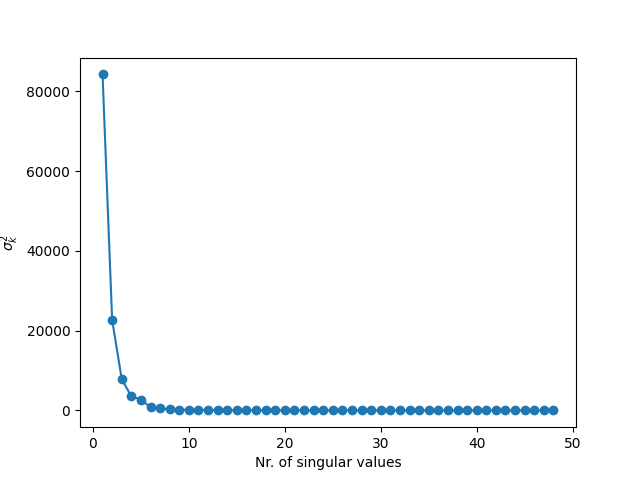

In [45]:
# 2e(iii) scree plot
# YOUR PART
nextplot()
plt.plot(np.arange(len(s))+1, s**2, '-o')
plt.xlabel('Nr. of singular values')
plt.ylabel('$\sigma_k^{2}$')
plt.show()

In [39]:
# 2e(iv) entropy
# YOUR PART
f = np.square(s)/np.sum(np.square(s))
E = - (1/np.log(np.min(X.shape))) * np.sum(f*np.log(f))

for i in range(1,len(s)+1):
    if np.sum(np.square(s[:i])/np.sum(np.square(s))) >= E:
        print(i)
        break

1


/var/folders/j5/tqm3_jyd1mz9mmb920s62hlm0000gn/T/ipykernel_47487/4244565582.py:8: RuntimeWarning: invalid value encountered in double_scalars
  e = (np.linalg.norm(X_residual, ord=2) - np.linalg.norm(X_residual_flip, ord=2))/np.linalg.norm(X_residual)


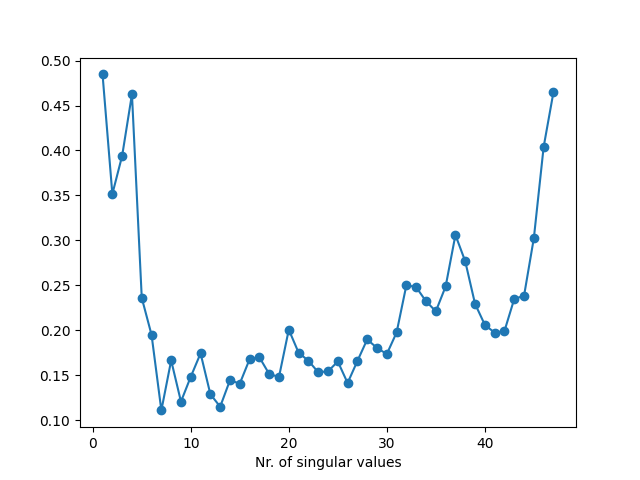

In [41]:
# 2e(v) random flips
# Random sign matrix: np.random.choice([-1,1], X.shape)
# YOUR PART
error_list = []
for i in range(1,len(s)+1):
    X_residual = U[:,i:][:,:len(s)-i] @ np.diag(s[i:]) @ Vt[i:,:]
    X_residual_flip =  X_residual * np.random.choice([-1,1], X.shape)
    e = (np.linalg.norm(X_residual, ord=2) - np.linalg.norm(X_residual_flip, ord=2))/np.linalg.norm(X_residual)
    error_list.append(e)

nextplot()
plt.plot(np.arange(len(s))+1, error_list, '-o')
plt.xlabel('Nr. of singular values')
plt.show()

In [ ]:
# 2e What, if any, of these would be your choice?
# YOUR PART
# In the Report

## 2f

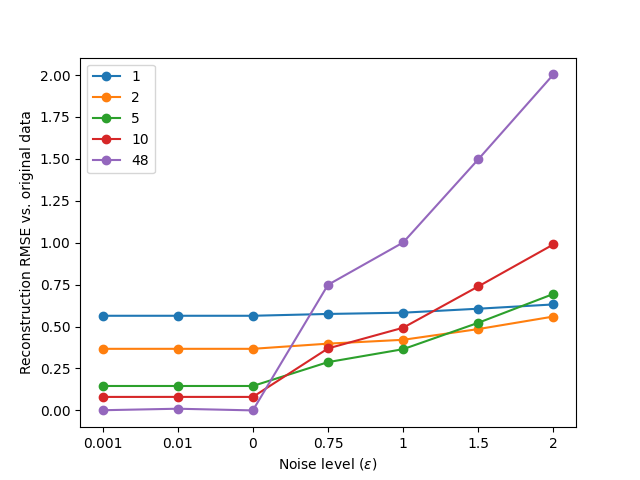

In [42]:
# Here is the empty plot that you need to fill (one line per choice of k: RSME between
# original X and the reconstruction from size-k SVD of noisy versions)
# YOUR PART
k_list = [1, 2, 5, 10, 48]
epsilon_list = [0.001,0.01,0, 0.75, 1, 1.5,2]
nextplot()
for k in k_list:
    rmse_list = []
    for epsilon in epsilon_list:
        X_noise = X + np.random.randn(*X.shape) * epsilon
        U_, s_, Vt_ = np.linalg.svd(X_noise)
        X_reconst = U_[:,:k] @ np.diag(s_[:k]) @ Vt_[:k,:]
        rmse = 1/np.sqrt(X.shape[0]*X.shape[1]) * np.linalg.norm(X-X_reconst)
        rmse_list.append(rmse)
    plt.plot([str(i) for i in epsilon_list], rmse_list, '-o')
plt.legend(k_list)
plt.xlabel(r"Noise level ($\epsilon$)")
plt.ylabel("Reconstruction RMSE vs. original data")
plt.show()

# 3 SVD and k-means

In [46]:
# Cluster the normalized climate data into 5 clusters using k-means and store
# the vector giving the cluster labels for each location.
X_clusters = KMeans(5).fit(X).labels_

## 3a

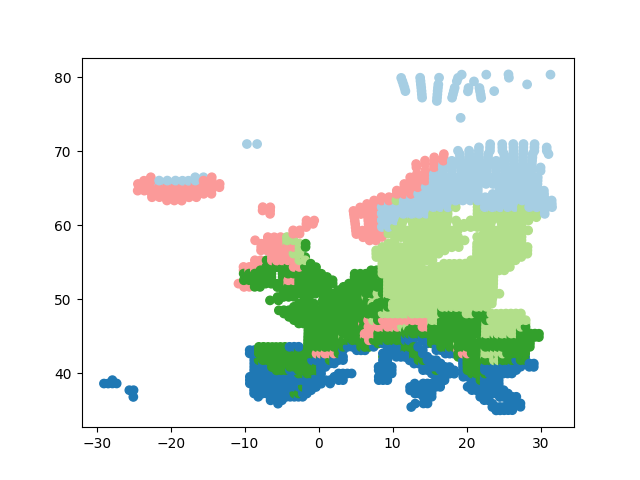

In [47]:
# Plot the results to the map: use the cluster labels to give the color to each
# point.
plot_xy(lon, lat, X_clusters)

## 3b

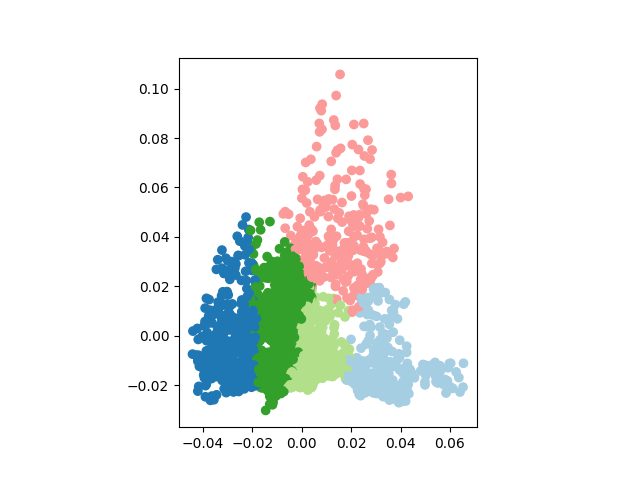

In [62]:
# YOUR PART HERE
plot_xy(U[:, 0], U[:, 1], X_clusters)

## 3c

In [63]:
# Compute the PCA scores, store in Z (of shape N x k)
k = 2
# YOUR PART HERE
Z = U[:,:k] @ np.diag(s[:k])

Text(0.5, 1.0, 'PCA $(k=2$)')

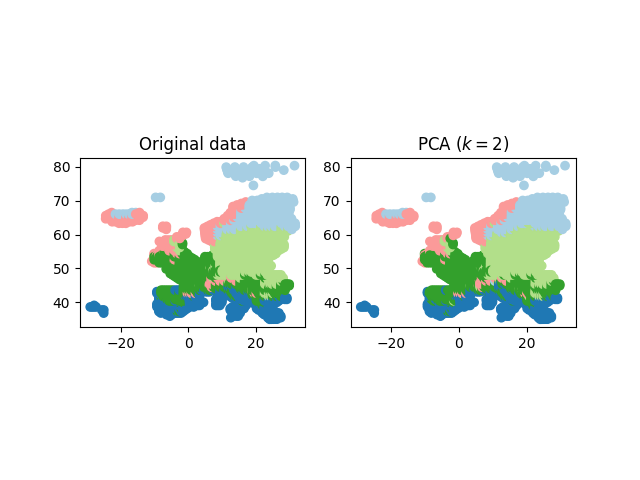

In [64]:
# cluster and visualize
Z_clusters = KMeans(5).fit(Z).labels_
# match clusters as well as possible (try without)
Z_clusters = match_categories(X_clusters, Z_clusters)
nextplot()
axs = plt.gcf().subplots(1, 2)
plot_xy(lon, lat, X_clusters, axis=axs[0])
axs[0].set_title("Original data")
plot_xy(lon, lat, Z_clusters, axis=axs[1])
axs[1].set_title(f"PCA $(k={k}$)")